In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [ ]:
train_df = pd.read_csv('mnist_train.csv',header=None)
test_df = pd.read_csv('mnist_test.csv',header=None)

print("Shape of train DataFrame:", train_df.shape)
print("Shape of test DataFrame:", train_df.shape)


Shape of train DataFrame: (60000, 785)
Shape of test DataFrame: (60000, 785)


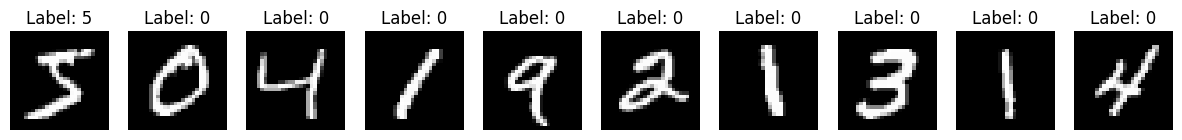

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    row = train_df.iloc[i]
    label = row[i]
    pixels = row[1:].to_numpy()
    image = pixels.reshape(28, 28)

    # Display the image
    ax = axes[ i % 10]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Remove axis ticks


plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

labels = train_df.iloc[:, 0]
pixels = train_df.iloc[:, 1:]
print("classes : " + str(np.unique(labels)))
print("dataset size : "+str(len(pixels)))

X_train, X_val, y_train, y_val = train_test_split(pixels, labels, test_size=0.2, random_state=42)
print("train dataset size : "+str(len(X_train)))
print("test dataset size : "+str(len(X_val)))



classes : [0 1 2 3 4 5 6 7 8 9]
dataset size : 60000
train dataset size : 48000
test dataset size : 12000


In [ ]:
from keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(3, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(6, (3, 3), activation='relu'),
    Flatten(),
    Dense(785, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 6)           │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3456)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 785)                 │       2,713,745 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,860 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,721,803 (10.38 MB)

 Trainable params: 2,721,803 (10.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0

# Reshape to (28, 28, 1) for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 6)           │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3456)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 785)                 │       2,713,745 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,860 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,721,803 (10.38 MB)

 Trainable params: 2,721,803 (10.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6106 - loss: 1.1254 - val_accuracy: 0.9200 - val_loss: 0.2541
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9455 - loss: 0.1872 - val_accuracy: 0.9549 - val_loss: 0.1433
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9651 - loss: 0.1177 - val_accuracy: 0.9671 - val_loss: 0.1129
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9726 - loss: 0.0878 - val_accuracy: 0.9739 - val_loss: 0.0890
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9789 - loss: 0.0662 - val_accuracy: 0.9762 - val_loss: 0.0822
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9831 - loss: 0.0525 - val_accuracy: 0.9781 - val_loss: 0.0733
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9776 - val_loss: 0.0760
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9889 - loss: 0.03

In [ ]:
# Separate features (X_test) and labels (y_test)
X_test = test_df.iloc[:, 1:].values  # All columns except the first for features
y_test = test_df.iloc[:, 0].values   # First column for labels

# Normalize pixel values (if not already done)
X_test = X_test / 255.0

# Reshape for CNN input (assuming grayscale images of 28x28)
X_test = X_test.reshape(-1, 28, 28, 1)

pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(pred_probs, axis=1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Accuracy: 0.9799

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:
[[ 973    2    0    0    1    0    2    0    1    1]
 [   0 1130    1    0    0    0    1    0    3    0]
 [   4    0 1011    3    2   